In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

# set seed
SEED = 1

# read data
wbc = pd.read_csv("https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv")
wbc.head()

wbc_df = wbc.drop(['id', 'Unnamed: 32'], axis = 1)
wbc_df = pd.get_dummies(wbc_df, drop_first = True)

X_columns = wbc_df.drop('diagnosis_M', axis = 1).columns
X = wbc_df.drop('diagnosis_M', axis = 1).values
y = wbc_df['diagnosis_M'].values


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)

rf = RandomForestRegressor(n_estimators=400,
                           min_samples_leaf=0.12,
                           random_state=SEED)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)

print('Test set RMSE of rf: {:.2f}'.format(rmse_test))



Test set RMSE of rf: 0.23


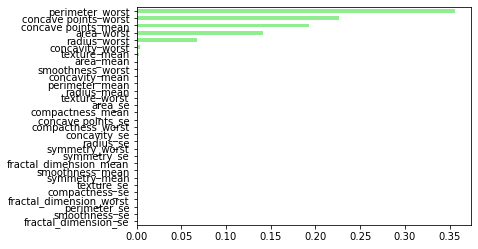

In [11]:
# Feature importance
import matplotlib.pyplot as plt

# create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X_columns)

# sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# create bar chart
sorted_importances_rf.plot(kind = 'barh',
                           color = 'lightgreen');
plt.show()